In [1]:
!pip install scikit-learn umap-learn sentence_transformers faiss-cpu plotly matplotlib datasets openai

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached openai-1.58.1-py3-none-any.whl.metadata (27 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached anyio-4.7.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached httpcore-1.0.7-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 1.7 MB/s eta 0:00:00ta 0:00:01
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached openai-1.58.1-py3-none-any.whl (454 kB)
Using cached anyio-4.7.0-py3-none-any.whl (93 kB)
Using cached distro-1.9.0-py3-none-any.whl (20 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached ht

In [ ]:
from src.text_clustering import ClusterClassifier
from datasets import load_dataset
import os
import json
from glob import glob
from tqdm import tqdm
from openai import OpenAI
import os

os.environ["OPENAI_API_KEY"] = <Type your API key here>

/t1data/users/ethan/.conda/envs/synthetic/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BM-K/KoSimCSE-roberta-multitask
/t1data/users/ethan/.conda/envs/test/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/t1data/users/ethan/.conda/envs/test/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
INFO:root:embedding texts...
Batches: 100%|██████████| 196/196 [08:44<00:00,  2.68s/it]
INFO:root:building faiss index...
INFO:root:projecting with umap...
INFO:root:dbscan clustering...


Using DBSCAN (eps, nim_samples)=((0.08,), 50)


INFO:root:summarizing cluster centers...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Request:
<s>[INST]예시 1:
【서울=뉴시스】(이름) 기자 = (이름)(67) 전 대통령의 국정농단 사건 대법원 선고가 일주일 앞으로 다가왔다. '비선실세' 최순실(63)씨 의혹이 대두된 지 약 3년 만에 박 전 대통령이 법원의 최종 심판을 받게 되는 것이다. 22일 법조계에 따르면 국정농단 파문을 촉발한 비선실세 의혹은 2016년 9월께 불거졌다. 미르·k스포츠 재단 출연금 모금 배경에 의혹이 제기됐고, 그 과정에서 최씨의 존재도 세상에 본격 드러나기 시작했다.10월24일 jtbc의 청와대 문건 유출 보도 이후 최씨가 (이름) 정부 국정에 개입했다는 의혹은 더욱 짙어졌다. 그간 최씨 존재를 부인해왔던 박 전 대통령은 '연설문 등에서 최씨 도움을 받은 건 맞다'고 인정했다.검찰은 곧 특별수사본부를 구성했다. 수사가 진행되던 중인 11월4일 박 전 대통령은 2차 대국민 담화

예시 2:
(이름) 사건 추정…최순실·(이름)과 함께 선고검찰, (이름) 녹취록·진술·문건 등 증거 공개【서울=뉴시스】(이름) (이름) 기자 = 청와대 비밀문건을 유출한 혐의로 기소된 (이름)(48) 전 청와대 부속비서관 측이 16일 최순실(61)씨의 태블릿pc 감정 신청을 철회했다. 서울중앙지법 형사합의22부(부장판사 (이름)) 심리로 열린 정 전 비서관의 공무상비밀누설 혐의 공판에서 정 전 비서관 측 변호인은 '태블릿pc 검증 감정 신청과 jtbc·출입국관리소 사실조회, jtbc 기자 증인 신청을 철회한다'고 밝혔다. 검찰은 이날 디지털 분석결과 증거조사를 통해 태블릿pc가 최씨 소유임을 강조했다. 검찰은 '태블릿pc의 위치정보와 데이터베이스 파일 등을 분석한 결과 독일과 제주도 등 최씨와 태블릿pc 동선이 일치한다'며 '최씨와 정 전 비서관이 공유

예시 3:
【세종=뉴시스】(이름) 기자 = 검찰이 지난 23일 국민연금 기금운용본부를 압수수색한 데 이어 24일 문형표 공단 이사장을 참고인 신분으로 부르자 국민연금이 당혹감을 감추지 못하고 있다. 국민연금 관계자는 이날 '전

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교통 및 고속도로 상황, 교육적 가치 점수: 5


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교육 정책 및 개혁, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정부 정책 및 사회기반시설, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 기여 및 자원봉사, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 건강과 공중보건, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 금융성과 및 기업 실적, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 범죄 및 법률, 교육적 가치 점수: 6


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 과학기술과 혁신, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 음악과 연예, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 범죄 및 법정 판결, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 상품 광고, 교육적 가치 점수: 3


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 부동산 및 주거 정책, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교통사고 및 음주운전, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 건강과 안전, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 소비자 보호, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 기상 및 날씨, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 노동 및 고용, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 아동교육, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 기업정책, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 해양 안전 및 구조 활동, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 노동 및 사회적 대화, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치 및 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 지진 및 자연재해, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 연예계 소식, 교육적 가치 점수: 5


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치 및 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 과학기술과 혁신, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 소비자 물가, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교통사고, 교육적 가치 점수: 6


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 취업 및 채용, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 논란 및 연예계 이슈, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 과학기술과 혁신, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 중소기업 지원 및 정책, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 금융 서비스 혁신, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 무역, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 자동차 산업 및 혁신, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 화재 및 안전, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 건강과 라이프스타일, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 이슈 및 범죄, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 취업과 인재 양성, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 노동시장 및 직장문화, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 범죄와 법적 문제, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 상품 광고, 교육적 가치 점수: 3


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 건강과 안전, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 과학기술과 혁신, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 범죄와 법적 처벌, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 상품 광고, 교육적 가치 점수: 3


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 부동산 시장, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 건강과 라이프스타일, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치 및 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 패션 및 연예, 교육적 가치 점수: 5


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경영 전략 및 혁신, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 고등교육 및 입학 전형, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 보험 및 금융, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 상품 광고, 교육적 가치 점수: 3


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교통사고 및 운행 지연, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 노동과 고용, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 재난 구호 및 지원, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교육 지원, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 금융 기술, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사기 및 범죄, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 통화정책 및 경제성장, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 인사 및 조직 변화, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 기상 및 자연재해, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 금융 서비스와 혁신, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 법률 및 헌법, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 상품 광고, 교육적 가치 점수: 3


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 기업 경영과 사회적 책임, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 환경과 지속가능성, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 게임 산업 및 모바일 게임, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 과학기술과 혁신, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 범죄 및 법 집행, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 기상 및 기후, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 참여 및 공모전, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치 및 정부, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 여행 및 항공 서비스, 교육적 가치 점수: 6


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 관광 및 여행, 교육적 가치 점수: 6


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 과학기술과 혁신, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 자동차 구매 프로모션, 교육적 가치 점수: 4


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 방송 시청률 분석, 교육적 가치 점수: 6


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 장례와 추모, 교육적 가치 점수: 6


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 건강과 라이프스타일, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 코로나19 및 건강, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 생활물가 동향, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 기상 및 날씨 정보, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 환경과 지속가능성, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 건강과 라이프스타일, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 환경과 지속가능성, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 에너지 및 환경, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 소비 트렌드, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 건강과 라이프스타일, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 소비 트렌드, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치 및 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 상품 광고, 교육적 가치 점수: 3


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 과학기술과 혁신, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 아동교육, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 과학기술과 혁신, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 가계부채와 금융, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 법과 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 기술 및 서비스 장애, 교육적 가치 점수: 6


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 과학기술과 혁신, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 법률 분쟁 및 기업 경쟁, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 통화정책 및 경제 전망, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 연예 및 스포츠, 교육적 가치 점수: 6


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교육 및 인사, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교통 및 이동, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교육 정책, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교통 안전, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 노동과 고용, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: e스포츠와 게임, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 자동차 유지보수 및 서비스, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 소비자 행동, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 조선업 및 해양 관련 산업, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 항공 및 교통, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 항공산업 및 저비용항공사, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 건강 및 감염병 예방, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 상품 광고, 교육적 가치 점수: 3


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 교육 및 협력, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 법조계 인사 및 제도, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 책임과 헌혈 활동, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 금융상품 및 서비스, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 성범죄 및 법적 대응, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 산업 안전사고, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 법률 및 사법, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 상품 광고, 교육적 가치 점수: 3


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 범죄 및 법 집행, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 정치와 정부, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 상품 광고, 교육적 가치 점수: 3


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 해양 환경 및 불법 어업, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 산업 발전, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 상품 광고, 교육적 가치 점수: 4


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 명예훼손 및 법정 소송, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 법과 범죄, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 안전사고 및 사고 예방, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 금융 정책 및 제도, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 역사와 문화, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 환경과 지속가능성, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 금융 및 기술 혁신, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 안전 및 범죄 예방, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 문화와 예술, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 금융 서비스, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 사회적 정의, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 과학기술과 혁신, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 법적 범죄 및 처벌, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 금융 및 투자 문제, 교육적 가치 점수: 7


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 경제 및 투자, 교육적 가치 점수: 9


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


주제: 아동교육, 교육적 가치 점수: 9
Number of clusters is 210


/t1data/users/ethan/.conda/envs/test/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
/t1data/users/ethan/.conda/envs/test/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  func(*args, **kwargs)
/t1data/users/ethan/.conda/envs/test/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  func(*args, **kwargs)
/t1data/users/ethan/.conda/envs/test/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/t1data/users/ethan/.conda/envs/test/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  func(*args, **kwargs)
/t1data/users/ethan/.cond

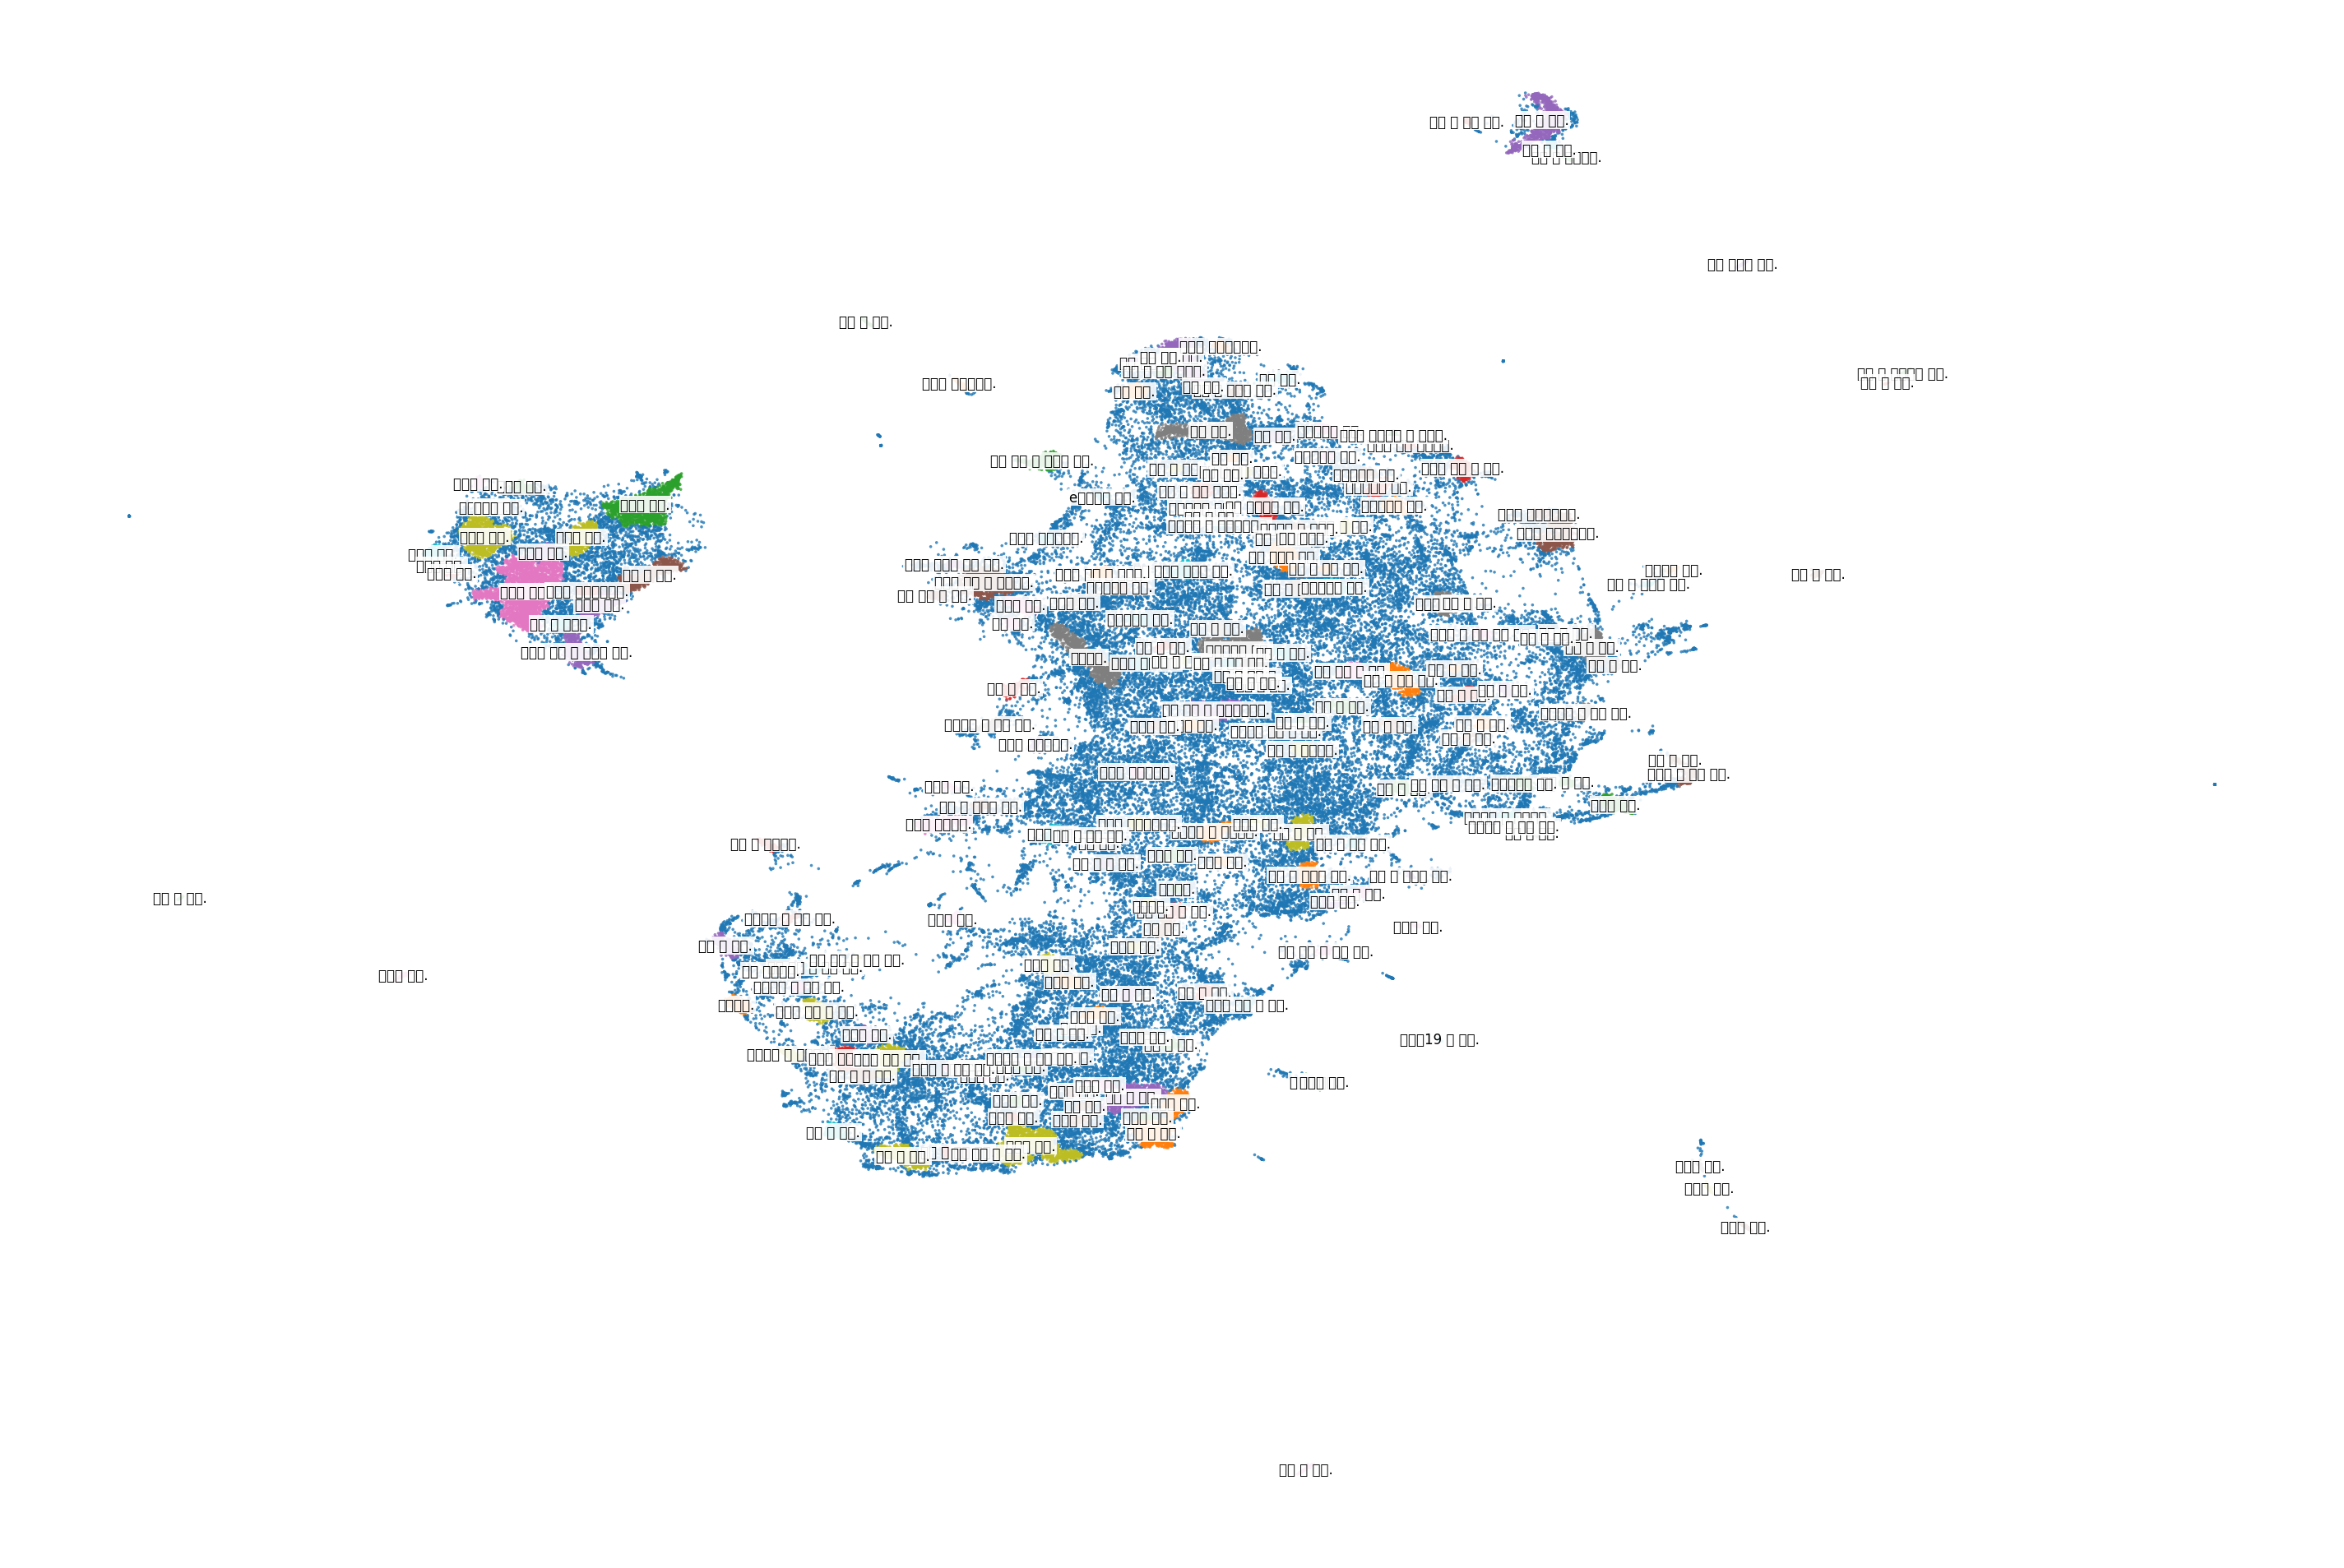

In [ ]:
texts = []
jsonl_path = "./sample.jsonl"
with open(jsonl_path, "r") as f:
    for line in f:
        texts.append(json.loads(line)["text"])
single_topic_instruction = (
    instruction
) = "위 예시들이 공유하는 공통 주제를 찾아 짧은 문장으로 설명하시오. \
주제의 예시: 경제 및 투자, 건강과 라이프스타일, 아동교육, 환경과 지속가능성, 사회적 정의, 인간권과 평화, 과학기술과 혁신, 문화와 예술, 역사와 문화, 정치와 정부 등. \
또, 그 문서들의 주제의 교육적 가치를 1~10점 사이로 평가하시오. \
어떤 경우에도 절대 나열을 하지 마시오. \
예시의 형식을 반드시 따를것. \
예시1) 주제: 경제 및 투자, 교육적 가치 점수: 8 \n\
예시2) 주제: 상품 광고, 교육적 가치 점수: 2"

cc = ClusterClassifier(embed_model_name="BM-K/KoSimCSE-roberta-multitask", embed_batch_size=512, embed_device="cuda", topic_mode="single_topic", summary_instruction=single_topic_instruction)

# run the pipeline:
embs, labels, summaries = cc.fit(texts)

# show the results
cc.show()

# save  
cc.save(f"./cluster_sample")

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BM-K/KoSimCSE-roberta-multitask
/t1data/users/ethan/.conda/envs/synthetic/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


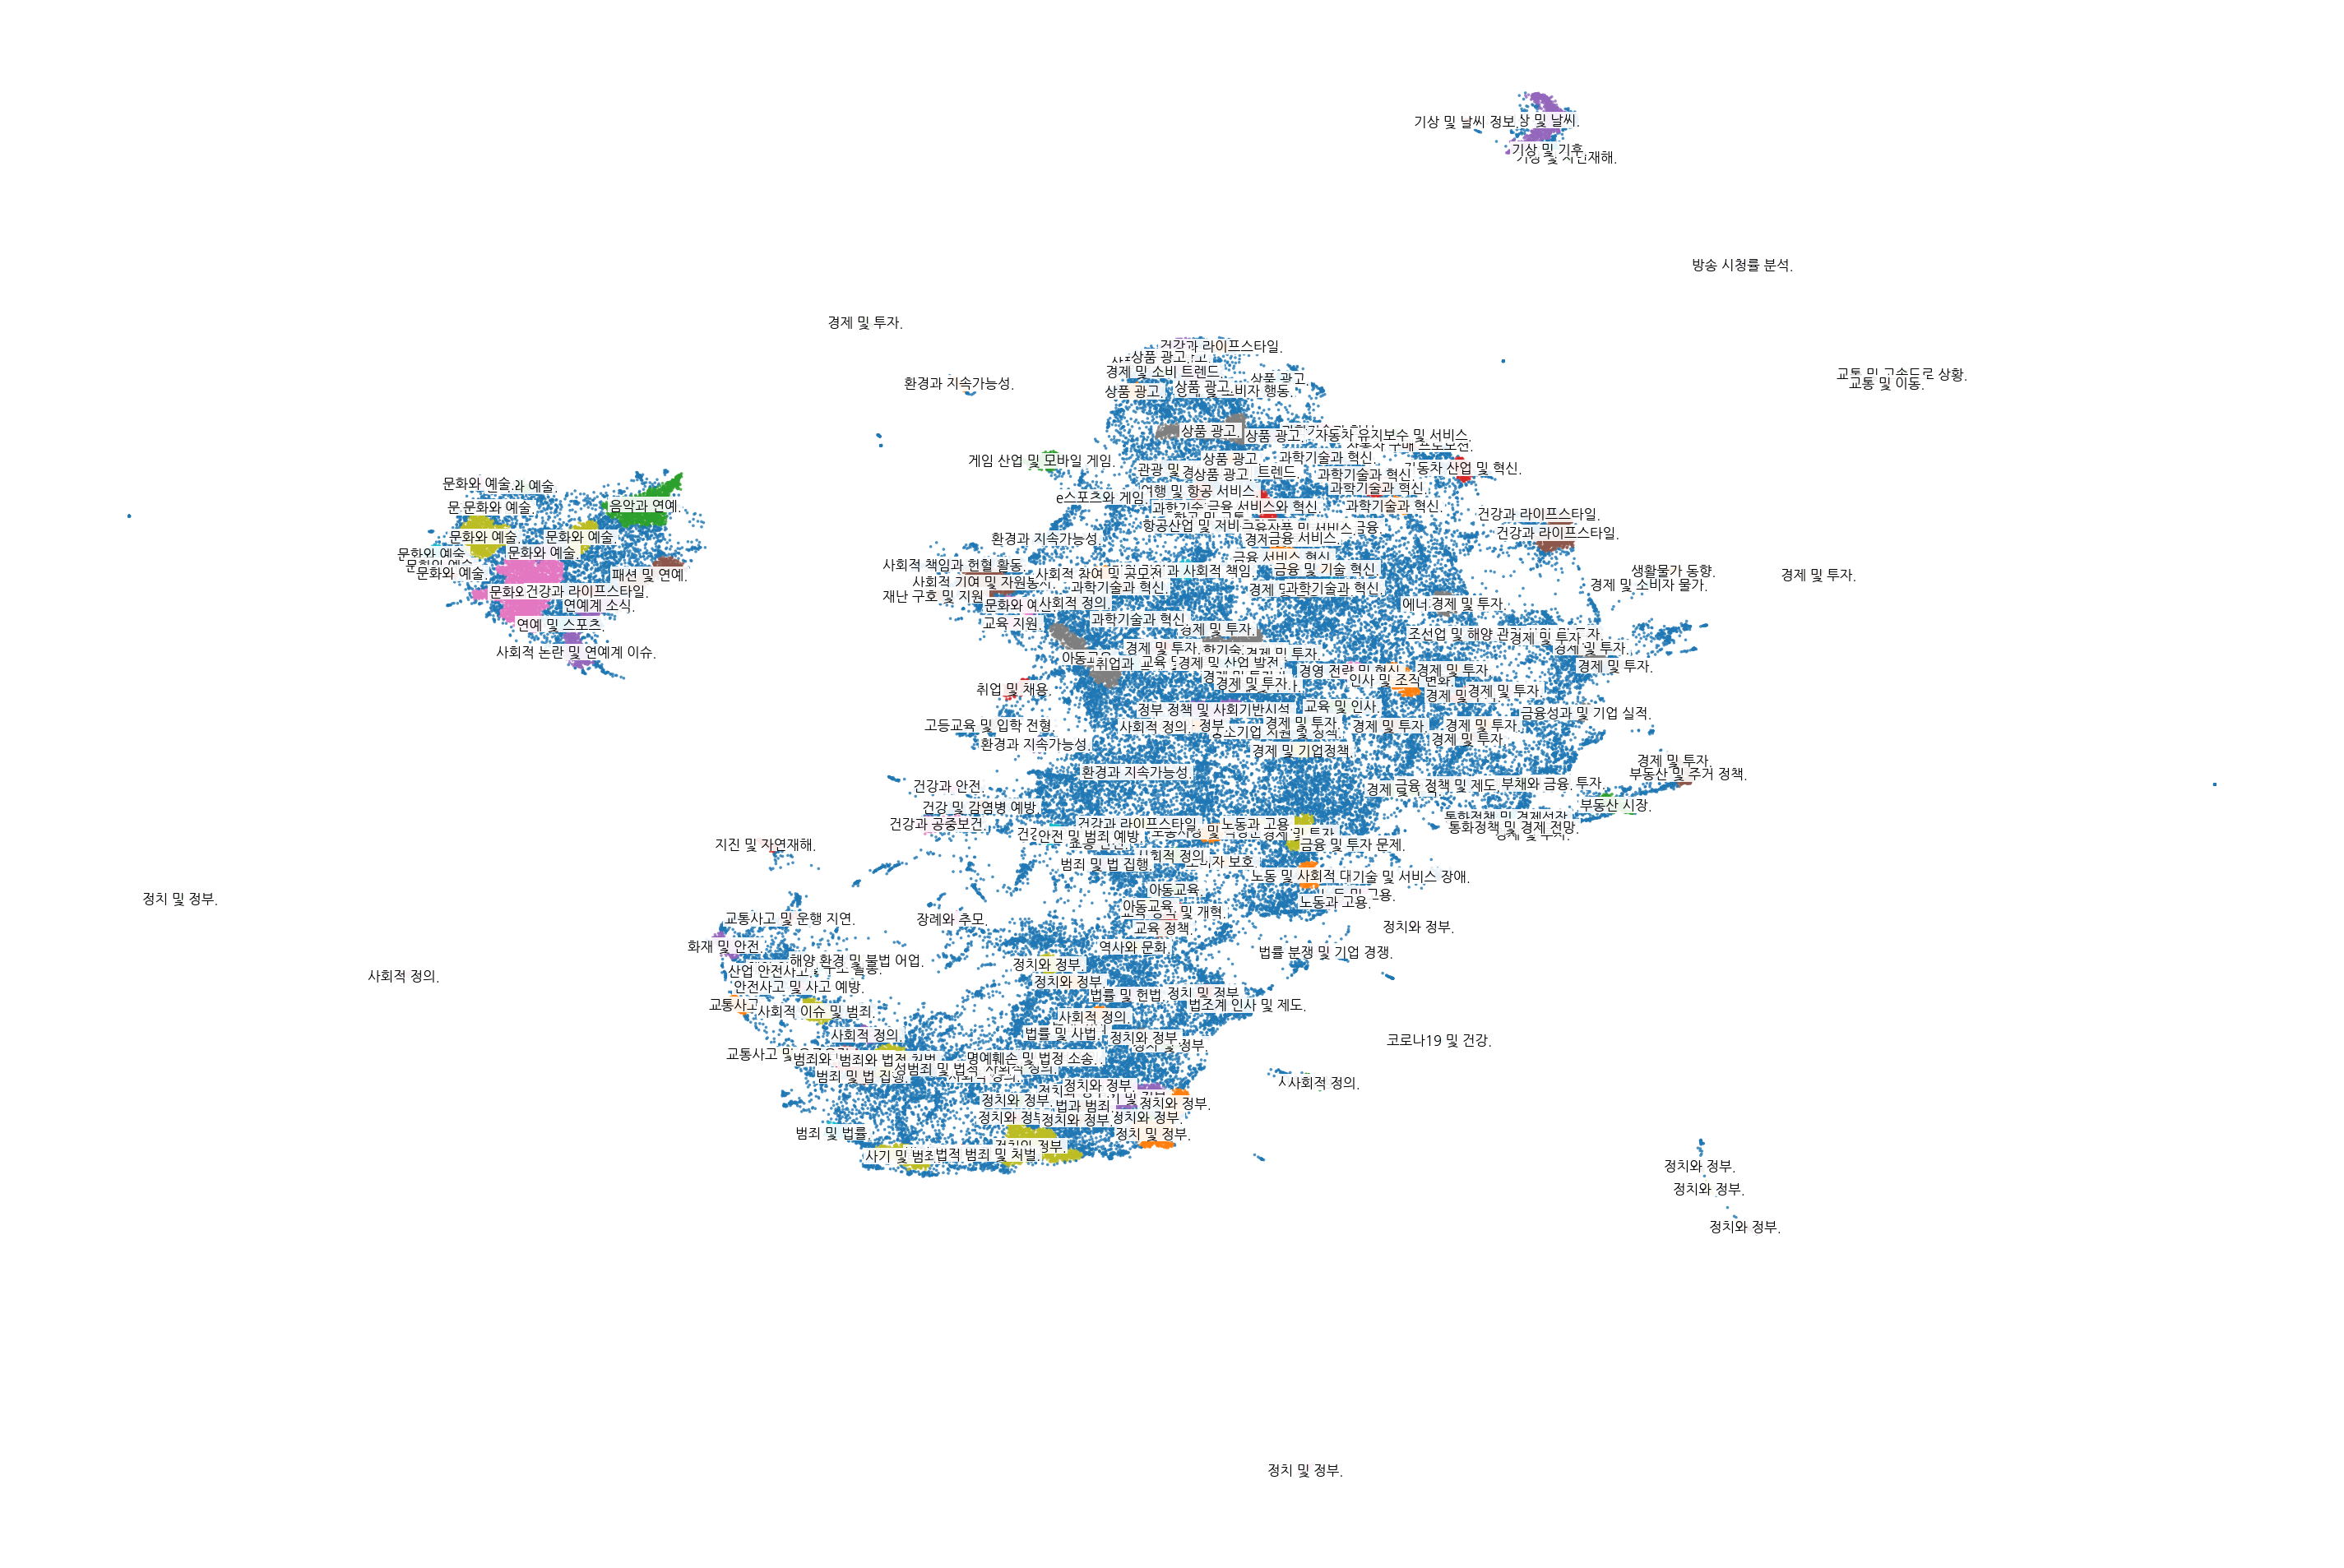

In [4]:
load_cluster = ClusterClassifier(embed_model_name="BM-K/KoSimCSE-roberta-multitask", embed_batch_size=512, embed_device="cuda", topic_mode="single_topic")
load_cluster.load(f"./cluster_sample")
load_cluster.show()

In [18]:
some_texts = "김경식씨는 돈키호테의 엮은이이다."

cluster_labels, embengs = load_cluster.infer([some_texts], top_k=1)
print(load_cluster.cluster_summaries[cluster_labels[0]])

100%|██████████| 1/1 [00:00<00:00, 12336.19it/s]

문화와 예술. Educational score: 7
